In [24]:
# Importing Libs

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv('heart.csv') # Dataset Path 

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape

(303, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Exploratory Data Analysis 

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Total Number of Dieases 1    165
0    138
Name: target, dtype: int64


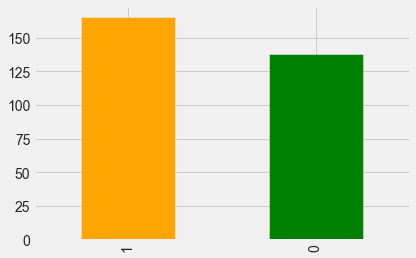

In [7]:
data.target.value_counts().plot(kind = 'bar', color = ['orange', 'green'])
print(f"Total Number of Dieases {data.target.value_counts()}")
# 1 Means having dieases and 0 means person is normal. 


In [8]:
# Checking Null Values

data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
categorical_val = []
continious_val = []

for column in data.columns:
    print("<===================>")
    print(f" {column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
        
    else:
        continious_val.append(column)
    

<===================>
 age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
<===================>
 sex : [1 0]
<===================>
 cp : [3 2 1 0]
<===================>
 trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
<===================>
 chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 3

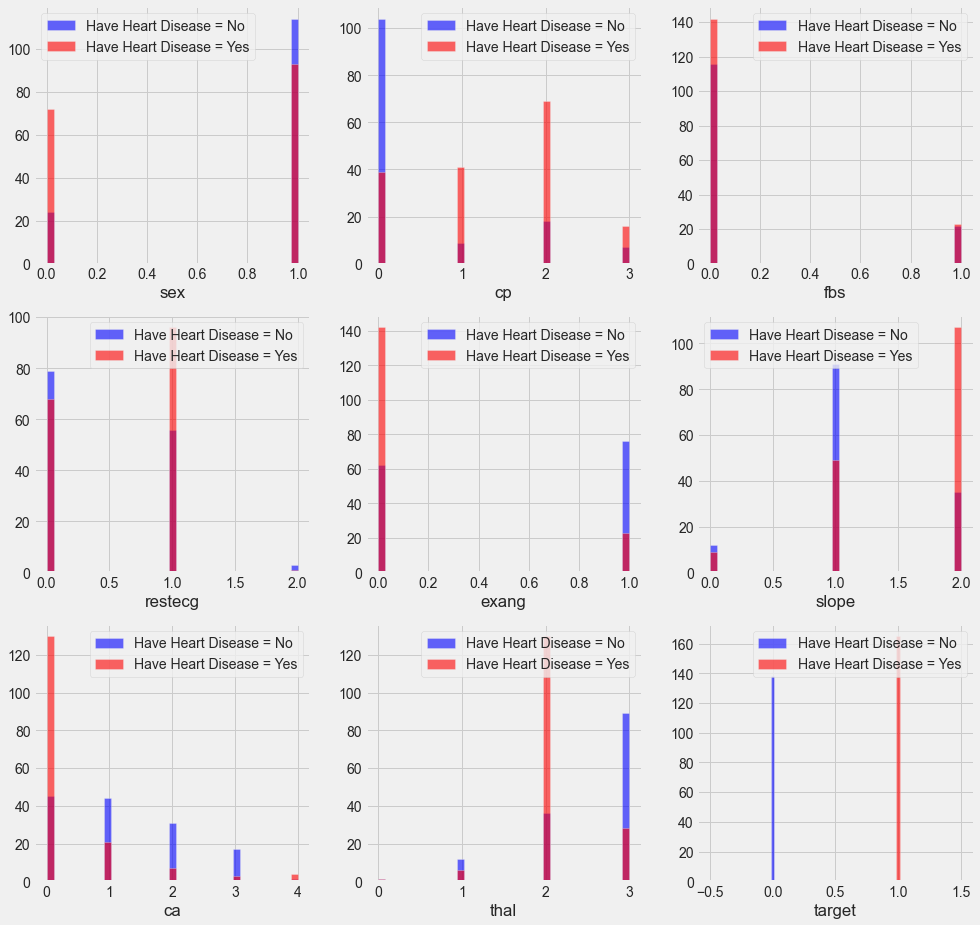

In [10]:
# Drawing Graphs to Understand Relations 

plt.figure(figsize=(15,15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3,3,i)
    data[data['target'] == 0][column].hist(bins = 35, color = 'blue', label = 'Have Heart Disease = No', alpha = 0.6)
    data[data['target'] == 1][column].hist(bins = 35, color = 'red', label = 'Have Heart Disease = Yes', alpha = 0.6)
    plt.legend()
    plt.xlabel(column)
    
    

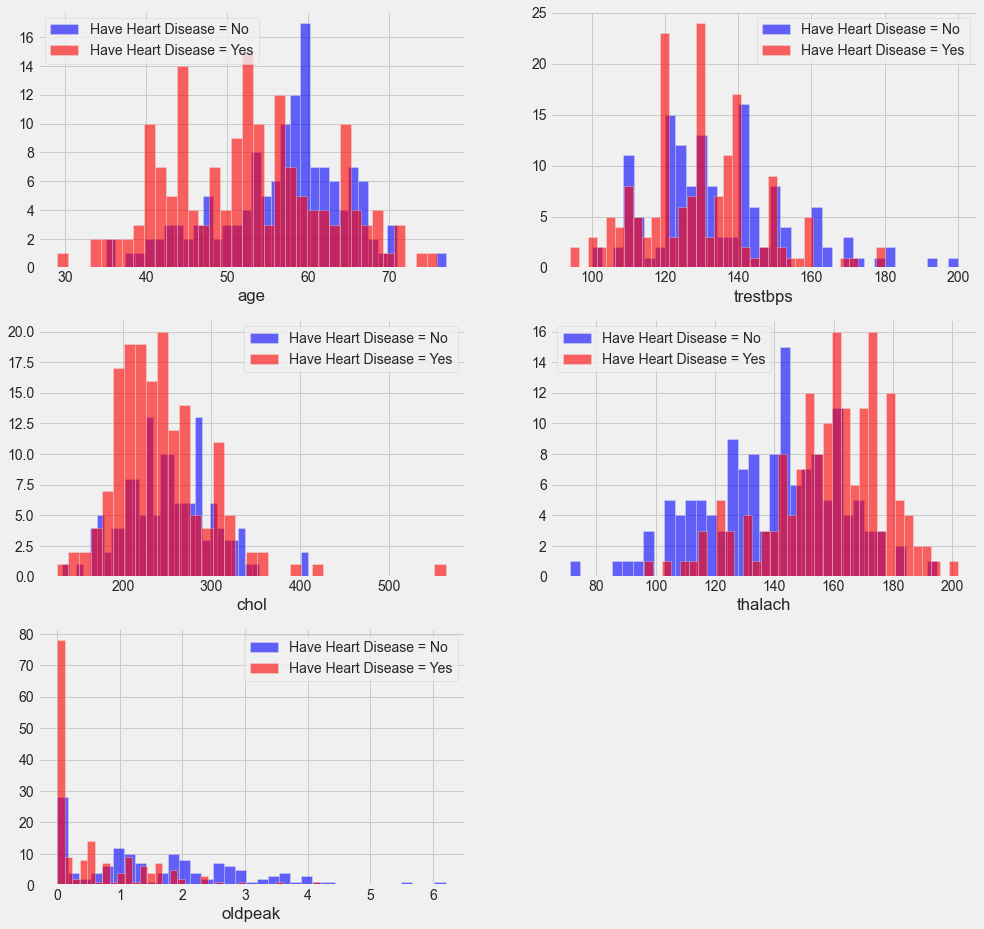

In [12]:
plt.figure(figsize = (15, 15))

for i, column in enumerate(continious_val, 1):
    plt.subplot(3,2,i)
    data[data['target'] == 0][column].hist( bins = 35, color = 'blue', label = 'Have Heart Disease = No', alpha = 0.6)
    data[data['target'] == 1][column].hist(bins = 35, color = 'red', label ='Have Heart Disease = Yes', alpha = 0.6)
    plt.legend()
    plt.xlabel(column)

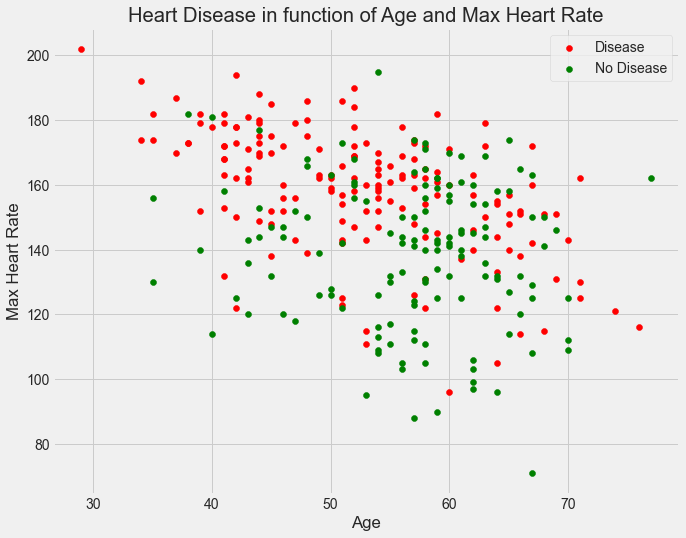

In [14]:
# Creating Scatter Plot

plt.figure(figsize = (10,8))


# Scatter with positive Exmamples

plt.scatter(data.age[data.target == 1],
           data.thalach[data.target == 1],
           c = 'red')

#Scattter with Negative Example

plt.scatter(data.age[data.target == 0],
           data.thalach[data.target ==0],
           c ='green')

#Some Information

plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease'])



(14.5, -0.5)

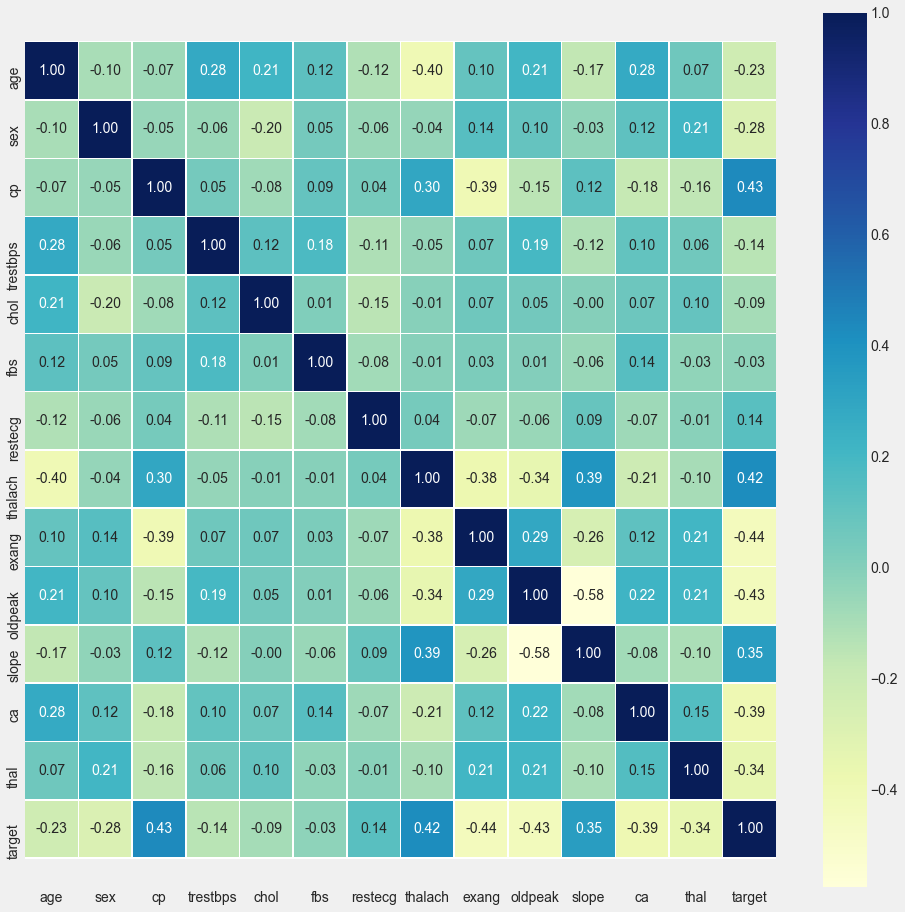

In [19]:
# Correlation Matrix 

corr_matrix = data.corr()

fig, ax = plt.subplots( figsize = (15,15))

ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidths= 0.5,
                fmt = '.2f',
                cmap = 'YlGnBu')
bottom, top = ax.get_ylim()

ax.set_ylim(bottom + 0.5, top-0.5)

<AxesSubplot:title={'center':'Correlation With Target'}>

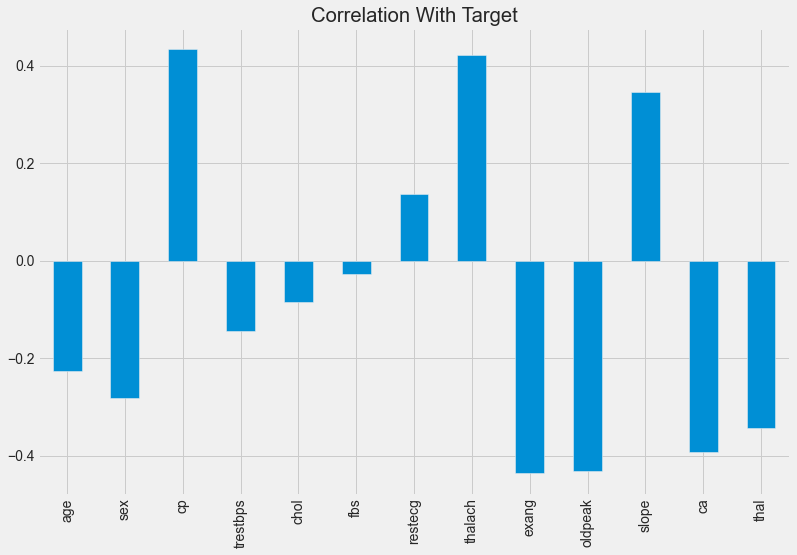

In [22]:
# Correlation with other variable 

data.drop('target', axis =1).corrwith(data.target).plot(kind = 'bar', grid = 'True', figsize = (12,8),
                                                     title = 'Correlation With Target')

In [23]:
# fbs and chol are the least correlated with the target variable.
# All other variables have a significant correlation with the target variable.

# Data Processing

categorical_val.remove('target')

dataset =  pd.get_dummies(data, columns = categorical_val)

from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()

col_to_Sc = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

dataset[col_to_Sc] = s_sc.fit_transform(dataset[col_to_Sc])

In [25]:
# Applying Logistic Regression 

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train = True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print('Train Result: \n ======================')
        
        print(f" Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print('___________________________')
        print(f" Classification Report:\n{clf_report}")
        print("__________________________")
        print(f" Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
              

In [26]:
# Splitting Data into Training and Test

from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis = 1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8,random_state=42)


In [28]:
# Training Machine Learning Model

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train,y_train)



LogisticRegression(solver='liblinear')

In [31]:
# Printing Performance of Model 
print_score(lr_clf, X_train, y_train, X_test, y_test, train = True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train = False)

Train Result: 
 Accuracy Score: 93.33%
___________________________
 Classification Report:
                   0          1  accuracy  macro avg  weighted avg
precision   0.931034   0.935484  0.933333   0.933259      0.933333
recall      0.931034   0.935484  0.933333   0.933259      0.933333
f1-score    0.931034   0.935484  0.933333   0.933259      0.933333
support    29.000000  31.000000  0.933333  60.000000     60.000000
__________________________
 Confusion Matrix: 
 [[27  2]
 [ 2 29]]

Test Result:
Accuracy Score: 83.13%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.846939    0.820690  0.831276    0.833814      0.832464
recall       0.761468    0.888060  0.831276    0.824764      0.831276
f1-score     0.801932    0.853047  0.831276    0.827489      0.830119
support    109.000000  134.000000  0.831276  243.000000    243.000000
_______________________________________________
C

In [30]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,93.333333,83.127572
